In [1]:
import tables, glob, os, time, sys
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.colors as colors
from scipy.stats import norm

from stl import mesh
from mpl_toolkits import mplot3d

In [2]:
#actually reads the h5 and organizes it nicely for us
# taken from https://github.com/nEXO-collaboration/chroma-simulation/blob/9aaea2dbc47a1020efa1e5efa8725739a178892c/Analysis/Input.py#L63

def ReadFile(Keys, File): 
    if not os.path.isfile(File):
        print('no')
        return
    else: 
        Data = {}
        try:
            with tables.open_file(File, mode="r") as f: 
                for Key in Keys:    
                    data = f.root._f_get_child(Key)._f_get_child(Key).read()
                    if data is None:
                        print(data)
                    Data[Key] = data
            if Data is None: 
                print(Data)
            return(Data)
        except:
            return 

In [3]:
#flags used to define what the photons hit during their lives
def GetPhotonFlags(Flags):
    PhotonFlags = {}
    PhotonFlags['NO_HIT'] = (Flags & (0x1 << 0)).astype(bool)   
    PhotonFlags['BULK_ABSORB'] = (Flags & (0x1 << 1)).astype(bool)   
    PhotonFlags['SURFACE_DETECT'] = (Flags & (0x1 << 2)).astype(bool)   
    PhotonFlags['SURFACE_ABSORB'] = (Flags & (0x1 << 3)).astype(bool)   
    PhotonFlags['RAYLEIGH_SCATTER'] = (Flags & (0x1 << 4)).astype(bool)   
    PhotonFlags['REFLECT_DIFFUSE'] = (Flags & (0x1 << 5)).astype(bool)   
    PhotonFlags['REFLECT_SPECULAR'] = (Flags & (0x1 << 6)).astype(bool)    
    PhotonFlags['SURFACE_REEMIT'] = (Flags & (0x1 << 7)).astype(bool)    
    PhotonFlags['SURFACE_TRANSMIT'] = (Flags & (0x1 << 8)).astype(bool)    
    PhotonFlags['BULK_REEMIT'] = (Flags & (0x1 << 9)).astype(bool)   
    PhotonFlags['MATERIAL_REFL'] = (Flags & (0x1 << 10)).astype(bool)  
    PhotonFlags['NAN_ABORT'] = (Flags & (0x1 << 31)).astype(bool)  
    return PhotonFlags

In [7]:
#keys of some of the possible data the h5 file can have
Keys1 = ['Origin', 'LastHitTriangle', 'IncidentAngles', 'DetectorHit', 
                        'Flags', 'FinalPosition', 'NumDetected', 'InitialPosition', 'DetectedPos', 'PhotonWavelength']

#file you want to look at goes here
File1 = "chroma_nEXO_OD_OD_fullAbs_WT_210624_101225_r9201.h5"

#gets you the data using the function above
Data1 = ReadFile(Keys1, File1)

In [8]:
print(Data1.keys())

for var in Data1.keys():
    print(var, "- number of entries:", len(Data1[var]))
    print("     ", Data1[var], '\n')

dict_keys(['Origin', 'LastHitTriangle', 'IncidentAngles', 'DetectorHit', 'Flags', 'FinalPosition', 'NumDetected', 'InitialPosition', 'DetectedPos', 'PhotonWavelength'])
Origin - number of entries: 1
      [[    0.     0. -3100.]] 

LastHitTriangle - number of entries: 4000
      [110357 110345 110333 ... 110340 110276     -1] 

IncidentAngles - number of entries: 3165
      [66.55616365 78.33996118 97.44848772 ... 84.39930886 86.64047834
 74.88832508] 

DetectorHit - number of entries: 3165
      [[ 906.98694 -730.7615   672.03516]
 [ 906.98694 -730.7615   672.03516]
 [ 906.98694 -730.7615   672.03516]
 ...
 [ 906.98694 -730.7615   672.03516]
 [ 906.98694 -730.7615   672.03516]
 [ 906.98694 -730.7615   672.03516]] 

Flags - number of entries: 4000
      [ 4  4 20 ...  4  4  2] 

FinalPosition - number of entries: 4000
      [[ 2535.2168  -3378.9202  -7483.51   ]
 [ 2182.7744  -1492.7892  -7483.5054 ]
 [  152.04695  -949.7786  -7483.5127 ]
 ...
 [  221.15398 -2474.8508  -7483.51   ]
 [-

385.7854


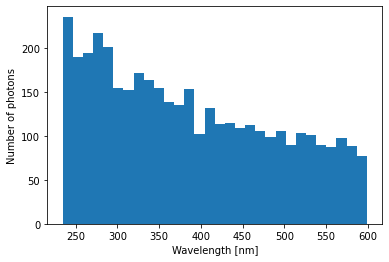

In [9]:
#plot a histogram of the photon wavelengths
wavelengths = Data1['PhotonWavelength'] 

print(np.average(wavelengths))
plt.hist(wavelengths, bins=30)
plt.xlabel("Wavelength [nm]")
plt.ylabel("Number of photons")
plt.show() 

## Looking at photon paths

In [10]:
#get photons' initial and final positions
I_pos = Data1['InitialPosition'].T
f_pos = Data1['FinalPosition'].T  

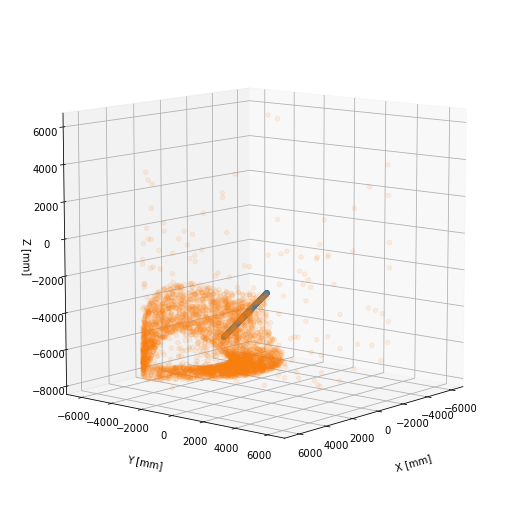

In [14]:
fig = plt.figure(figsize=(7,7))
axes = mplot3d.Axes3D(fig)

#plots data as a scatter plot
axes.scatter3D(I_pos[0], I_pos[1], I_pos[2], 'blue')
axes.scatter3D(f_pos[0], f_pos[1], f_pos[2], 'red', alpha=0.1)   

# adjust plotting limits
# axes.set_xlim3d(-100, 100)
# axes.set_ylim3d(-100, 100)
# axes.set_zlim3d(-3600, -3200)

#formatting
axes.set_xlabel("X [mm]")
axes.set_ylabel("Y [mm]")
axes.set_zlabel("Z [mm]")
axes.xaxis.labelpad=20
axes.yaxis.labelpad=15
# axes.zaxis.labelpad=15

# axes.legend()
# fig.colorbar(p, label="Step Number", shrink=0.8)

#change angle of view - (elevation, azimuth) angles in degrees
# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
axes.view_init(10, 40)
# 0, 90 - XZ plane; 90, 90 - top view

plt.show()